# Import Libraries

In [50]:
from sklearn.preprocessing import LabelBinarizer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from Module.nn import shallownet
from keras.optimizers import SGD
import matplotlib.pyplot as plt 
from keras.datasets import cifar10

# Normalize Data

In [51]:
print("[info] Loading Cifar10 data")
((trainx, trainy),(testx, testy)) = cifar10.load_data()
trainX = trainx / 255.0
testX = testx / 255.0

[info] Loading Cifar10 data


# Instantiation

In [52]:
lb = LabelBinarizer()

In [53]:
trainY = lb.fit_transform(trainy)
testY = lb.fit_transform(testy)
# Initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Initialize optimizer and model and train it

In [43]:
print("[info] compiling Network")
opt = SGD(lr = 0.01)
model = shallownet.ShallowNet.build(width = 32, height = 32, depth = 3, classes = 10)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
S
print("[Info] training network")
H = model.fit(trainX, trainY, validation_data = (testX, testY), batch_size =32, epochs =40, verbose = 1)

[info] compiling Network
[Info] training network
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 77s 2ms/step - loss: 1.8056 - accuracy: 0.3658 - val_loss: 1.6516 - val_accuracy: 0.4263
Epoch 2/40
50000/50000 [==============================] - 78s 2ms/step - loss: 1.5656 - accuracy: 0.4555 - val_loss: 1.5605 - val_accuracy: 0.4341
Epoch 3/40
50000/50000 [==============================] - 80s 2ms/step - loss: 1.4194 - accuracy: 0.5034 - val_loss: 1.3787 - val_accuracy: 0.5092
Epoch 4/40
50000/50000 [==============================] - 82s 2ms/step - loss: 1.3324 - accuracy: 0.5328 - val_loss: 1.3462 - val_accuracy: 0.5239
Epoch 5/40
50000/50000 [==============================] - 79s 2ms/step - loss: 1.2744 - accuracy: 0.5544 - val_loss: 1.3043 - val_accuracy: 0.5286
Epoch 6/40
50000/50000 [==============================] - 84s 2ms/step - loss: 1.2356 - accuracy: 0.5656 - val_loss: 1.2921 - val_accuracy: 0.5451
Epoch 7/40
50000/50

# Evaluate Network

In [46]:
print("[info] evaluating Network ")
preds = model.predict(testX, batch_size = 32)
print(classification_report(testY.argmax(axis = 1),
                           preds.argmax(axis = 1), target_names = labelNames))

[info] evaluating Network 
              precision    recall  f1-score   support

    airplane       0.60      0.71      0.65      1000
  automobile       0.77      0.67      0.72      1000
        bird       0.55      0.30      0.39      1000
         cat       0.49      0.29      0.37      1000
        deer       0.55      0.49      0.52      1000
         dog       0.47      0.56      0.51      1000
        frog       0.71      0.65      0.68      1000
       horse       0.47      0.81      0.59      1000
        ship       0.69      0.71      0.70      1000
       truck       0.65      0.68      0.67      1000

    accuracy                           0.59     10000
   macro avg       0.60      0.59      0.58     10000
weighted avg       0.60      0.59      0.58     10000



# Plot to see how your network works 

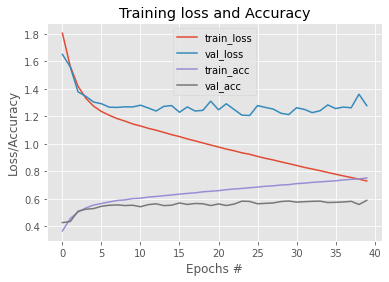

In [49]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_accuracy"], label="val_acc")
plt.title("Training loss and Accuracy")
plt.xlabel("Epochs #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


# Conclusion